In [1]:
# Importing the required packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn import metrics, preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Loading the required dataset

In [4]:
data = pd.read_csv('PL_XSELL.csv')

In [5]:
data.head()

,CUST_ID,TARGET,AGE,GENDER,BALANCE,OCCUPATION,AGE_BKT,SCR,HOLDING_PERIOD,ACC_TYPE,...,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN,random
0,C7927,0,27,M,3383.75,SELF-EMP,26-30,776,30,SA,...,0,0,13100.0,0.0,0.0,486778.50,0.0,1,1,0.000011
1,C6877,0,47,M,287489.04,SAL,46-50,324,28,SA,...,0,0,6600.0,0.0,0.0,799813.00,0.0,1,0,0.000111
2,C19922,0,40,M,18216.88,SELF-EMP,36-40,603,2,SA,...,0,1,11200.0,561120.0,24660.0,997570.00,0.0,1,1,0.000120
3,C8183,0,53,M,71720.48,SAL,>50,196,13,CA,...,0,0,13050.0,168397.5,15195.0,247168.67,71388.0,1,0,0.000137
4,C12123,0,36,M,1671622.89,PROF,36-40,167,24,SA,...,0,0,0.0,808480.0,0.0,0.00,0.0,1,0,0.000174


In [6]:
data.dtypes

CUST_ID                      object
TARGET                        int64
AGE                           int64
GENDER                       object
BALANCE                     float64
OCCUPATION                   object
AGE_BKT                      object
SCR                           int64
HOLDING_PERIOD                int64
ACC_TYPE                     object
ACC_OP_DATE                  object
LEN_OF_RLTN_IN_MNTH           int64
NO_OF_L_CR_TXNS               int64
NO_OF_L_DR_TXNS               int64
TOT_NO_OF_L_TXNS              int64
NO_OF_BR_CSH_WDL_DR_TXNS      int64
NO_OF_ATM_DR_TXNS             int64
NO_OF_NET_DR_TXNS             int64
NO_OF_MOB_DR_TXNS             int64
NO_OF_CHQ_DR_TXNS             int64
FLG_HAS_CC                    int64
AMT_ATM_DR                    int64
AMT_BR_CSH_WDL_DR             int64
AMT_CHQ_DR                    int64
AMT_NET_DR                  float64
AMT_MOB_DR                    int64
AMT_L_DR                    float64
FLG_HAS_ANY_CHGS            

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,20000.0,0.125600,0.331406,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00
AGE,20000.0,38.418150,9.577985,21.000000,30.000000,38.000000,4.600000e+01,5.500000e+01
BALANCE,20000.0,511362.192118,723592.961792,0.000000,64754.025000,231675.845000,6.538768e+05,8.360431e+06
SCR,20000.0,440.150300,249.887582,100.000000,227.000000,364.000000,6.440000e+02,9.990000e+02
HOLDING_PERIOD,20000.0,14.955650,8.642634,1.000000,7.000000,15.000000,2.200000e+01,3.100000e+01
LEN_OF_RLTN_IN_MNTH,20000.0,125.239300,54.953936,29.000000,79.000000,125.000000,1.720000e+02,2.210000e+02
NO_OF_L_CR_TXNS,20000.0,12.348050,12.151921,0.000000,6.000000,10.000000,1.400000e+01,7.500000e+01
NO_OF_L_DR_TXNS,20000.0,6.633700,7.675830,0.000000,2.000000,5.000000,7.000000e+00,7.400000e+01
TOT_NO_OF_L_TXNS,20000.0,18.975400,17.759290,0.000000,9.000000,14.000000,2.100000e+01,1.490000e+02
NO_OF_BR_CSH_WDL_DR_TXNS,20000.0,1.883000,2.263596,0.000000,1.000000,1.000000,2.000000e+00,1.500000e+01


In [8]:
df = data.drop(['CUST_ID','ACC_OP_DATE','AGE_BKT','random'],axis=1)
df.head()

,TARGET,AGE,GENDER,BALANCE,OCCUPATION,SCR,HOLDING_PERIOD,ACC_TYPE,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,...,AMT_MIN_BAL_NMC_CHGS,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN
0,0,27,M,3383.75,SELF-EMP,776,30,SA,146,7,...,0,0,0,13100.0,0.0,0.0,486778.50,0.0,1,1
1,0,47,M,287489.04,SAL,324,28,SA,104,8,...,0,0,0,6600.0,0.0,0.0,799813.00,0.0,1,0
2,0,40,M,18216.88,SELF-EMP,603,2,SA,61,10,...,0,0,1,11200.0,561120.0,24660.0,997570.00,0.0,1,1
3,0,53,M,71720.48,SAL,196,13,CA,107,36,...,0,0,0,13050.0,168397.5,15195.0,247168.67,71388.0,1,0
4,0,36,M,1671622.89,PROF,167,24,SA,185,20,...,0,0,0,0.0,808480.0,0.0,0.00,0.0,1,0


In [9]:
df['GENDER'] = df['GENDER'].map({'M':0,'F':1,'O':2})

In [10]:
df['OCCUPATION'].value_counts()

SAL         5855
PROF        5417
SENP        5160
SELF-EMP    3568
Name: OCCUPATION, dtype: int64

In [11]:
df['OCCUPATION'] = df['OCCUPATION'].map({'SAL':0,'PROF':1,'SENP':2,'SELF-EMP':3})

In [12]:
df['ACC_TYPE'].value_counts()

SA    15759
CA     4241
Name: ACC_TYPE, dtype: int64

In [13]:
df['ACC_TYPE'] = df['ACC_TYPE'].map({'SA':0,'CA':1})

In [14]:
df.dtypes

TARGET                        int64
AGE                           int64
GENDER                        int64
BALANCE                     float64
OCCUPATION                    int64
SCR                           int64
HOLDING_PERIOD                int64
ACC_TYPE                      int64
LEN_OF_RLTN_IN_MNTH           int64
NO_OF_L_CR_TXNS               int64
NO_OF_L_DR_TXNS               int64
TOT_NO_OF_L_TXNS              int64
NO_OF_BR_CSH_WDL_DR_TXNS      int64
NO_OF_ATM_DR_TXNS             int64
NO_OF_NET_DR_TXNS             int64
NO_OF_MOB_DR_TXNS             int64
NO_OF_CHQ_DR_TXNS             int64
FLG_HAS_CC                    int64
AMT_ATM_DR                    int64
AMT_BR_CSH_WDL_DR             int64
AMT_CHQ_DR                    int64
AMT_NET_DR                  float64
AMT_MOB_DR                    int64
AMT_L_DR                    float64
FLG_HAS_ANY_CHGS              int64
AMT_OTH_BK_ATM_USG_CHGS       int64
AMT_MIN_BAL_NMC_CHGS          int64
NO_OF_IW_CHQ_BNC_TXNS       

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,20000.0,0.125600,0.331406,0.0,0.000,0.000,0.00,1.00
AGE,20000.0,38.418150,9.577985,21.0,30.000,38.000,46.00,55.00
GENDER,20000.0,0.290750,0.474685,0.0,0.000,0.000,1.00,2.00
BALANCE,20000.0,511362.192118,723592.961792,0.0,64754.025,231675.845,653876.85,8360430.57
OCCUPATION,20000.0,1.322050,1.077354,0.0,0.000,1.000,2.00,3.00
SCR,20000.0,440.150300,249.887582,100.0,227.000,364.000,644.00,999.00
HOLDING_PERIOD,20000.0,14.955650,8.642634,1.0,7.000,15.000,22.00,31.00
ACC_TYPE,20000.0,0.212050,0.408770,0.0,0.000,0.000,0.00,1.00
LEN_OF_RLTN_IN_MNTH,20000.0,125.239300,54.953936,29.0,79.000,125.000,172.00,221.00
NO_OF_L_CR_TXNS,20000.0,12.348050,12.151921,0.0,6.000,10.000,14.00,75.00


In [17]:
df.isnull().sum()

TARGET                      0
AGE                         0
GENDER                      0
BALANCE                     0
OCCUPATION                  0
SCR                         0
HOLDING_PERIOD              0
ACC_TYPE                    0
LEN_OF_RLTN_IN_MNTH         0
NO_OF_L_CR_TXNS             0
NO_OF_L_DR_TXNS             0
TOT_NO_OF_L_TXNS            0
NO_OF_BR_CSH_WDL_DR_TXNS    0
NO_OF_ATM_DR_TXNS           0
NO_OF_NET_DR_TXNS           0
NO_OF_MOB_DR_TXNS           0
NO_OF_CHQ_DR_TXNS           0
FLG_HAS_CC                  0
AMT_ATM_DR                  0
AMT_BR_CSH_WDL_DR           0
AMT_CHQ_DR                  0
AMT_NET_DR                  0
AMT_MOB_DR                  0
AMT_L_DR                    0
FLG_HAS_ANY_CHGS            0
AMT_OTH_BK_ATM_USG_CHGS     0
AMT_MIN_BAL_NMC_CHGS        0
NO_OF_IW_CHQ_BNC_TXNS       0
NO_OF_OW_CHQ_BNC_TXNS       0
AVG_AMT_PER_ATM_TXN         0
AVG_AMT_PER_CSH_WDL_TXN     0
AVG_AMT_PER_CHQ_TXN         0
AVG_AMT_PER_NET_TXN         0
AVG_AMT_PE

In [19]:
(['BALANCE','SCR','ATM_AMT_DR','ATM_CHQ_DR','AMT_NET_DR','AMT_MOB_DR','AMT_L_DR','AVG_AMT_PER_ATM_TXN',
  'AVG_AMT_PER_CSH_WDL_TXN','AVG_AMT_PER_CHQ_TXN','AVG_AMT_PER_NET_TXN','AVG_AMT_PER_ATM_TXN'])

['BALANCE',
 'SCR',
 'ATM_AMT_DR',
 'ATM_CHQ_DR',
 'AMT_NET_DR',
 'AMT_MOB_DR',
 'AMT_L_DR',
 'AVG_AMT_PER_ATM_TXN',
 'AVG_AMT_PER_CSH_WDL_TXN',
 'AVG_AMT_PER_CHQ_TXN',
 'AVG_AMT_PER_NET_TXN',
 'AVG_AMT_PER_ATM_TXN']

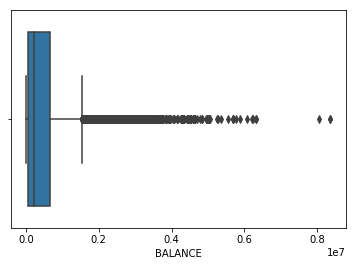

In [20]:
sns.boxplot(df['BALANCE'])

In [22]:
# Since the domain is banking domain, and the outliers are only present in money and transaction related columns,
# we will keep the outliers and proceed further

In [23]:
df['GENDER'] = df['GENDER'].astype('category')
df['OCCUPATION'] = df['OCCUPATION'].astype('category')
df['ACC_TYPE'] = df['ACC_TYPE'].astype('category')
df['FLG_HAS_CC'] = df['FLG_HAS_CC'].astype('category')
df['FLG_HAS_ANY_CHGS'] = df['FLG_HAS_ANY_CHGS'].astype('category')
df['FLG_HAS_NOMINEE'] = df['FLG_HAS_NOMINEE'].astype('category')
df['FLG_HAS_OLD_LOAN'] = df['FLG_HAS_OLD_LOAN'].astype('category')
df['TARGET'] = df['TARGET'].astype('category')

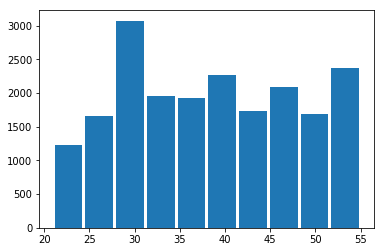

In [24]:
# EDA

plt.hist(x = df['AGE'],rwidth=0.9)
plt.show()

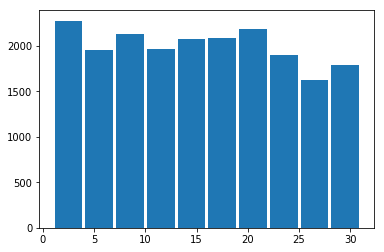

In [25]:
plt.hist(x = df['HOLDING_PERIOD'],rwidth=0.9,bins=10)
plt.show()

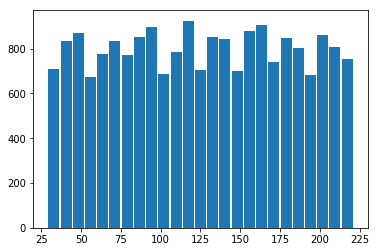

In [26]:
plt.hist(x = df['LEN_OF_RLTN_IN_MNTH'],rwidth=0.9,bins=25)
plt.show()

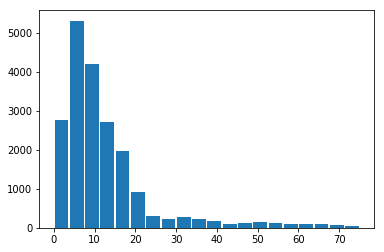

In [27]:
plt.hist(x = df['NO_OF_L_CR_TXNS'],rwidth=0.9,bins=20)
plt.show()

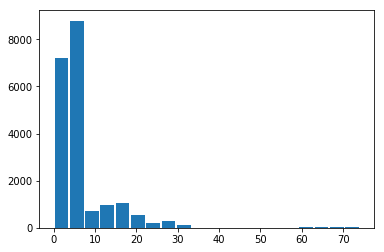

In [28]:
plt.hist(x = df['NO_OF_L_DR_TXNS'],rwidth=0.9,bins=20)
plt.show()

In [29]:
#From the histograms we can see that
#The frequency distribution for AGE shows that the targeted customers are highest in the age group between 26–30.
#The Holding Period (Ability to hold money in the account) and 
# length of relationship with the bank are more or less evenly distributed.
#The customers had most of their credit transactions in the range between 0–15 and debit transactions less than 10.

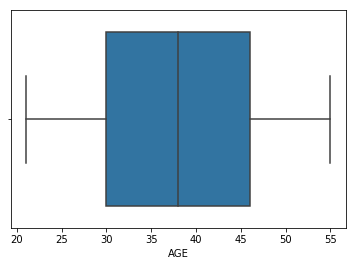

In [30]:
sns.boxplot(x=df['AGE'])

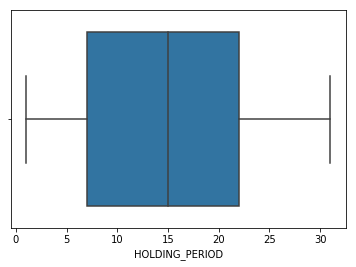

In [31]:
sns.boxplot(x=df['HOLDING_PERIOD'])

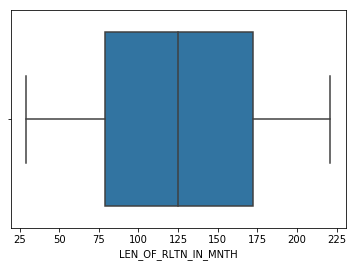

In [32]:
sns.boxplot(x=df['LEN_OF_RLTN_IN_MNTH'])

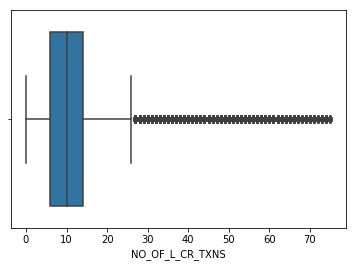

In [33]:
sns.boxplot(x=df['NO_OF_L_CR_TXNS'])

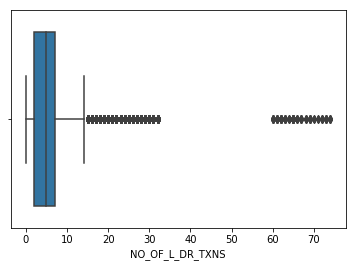

In [34]:
sns.boxplot(x=df['NO_OF_L_DR_TXNS'])

In [35]:
# From the box plots, we can visualize and infer:

# Box plot shows the following median values for the numeric variables: 
# age around 38 years, holding period i.e. ability to hold money in the account of 15 months, 
# Length of relationship with bank at 125 months, No. of credit transactions 10, and no. of debit transactions = 5.

# There are many outliers for the variables no. of credit transactions and no. of debit transactions.

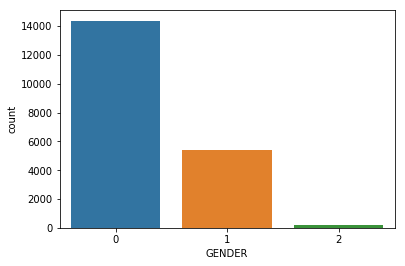

In [36]:
sns.countplot(x='GENDER',data=df) # O - Male, 1 - Female 2 - Others

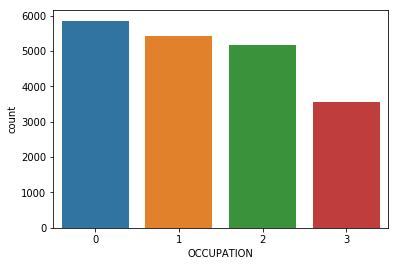

In [37]:
sns.countplot(x='OCCUPATION',data=df) # SAL - 0, PROF - 1, SENP - 2, SELF-EMP - 3

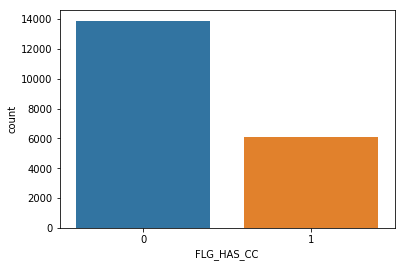

In [38]:
sns.countplot(x='FLG_HAS_CC',data=df)

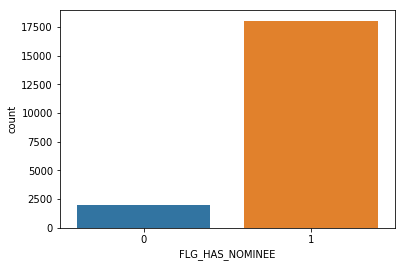

In [39]:
sns.countplot(x='FLG_HAS_NOMINEE',data=df)

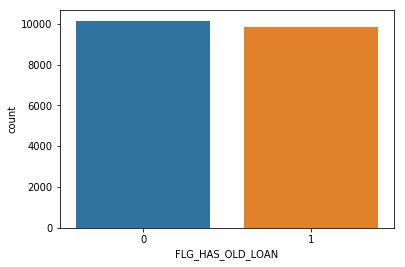

In [40]:
sns.countplot(x='FLG_HAS_OLD_LOAN',data=df)

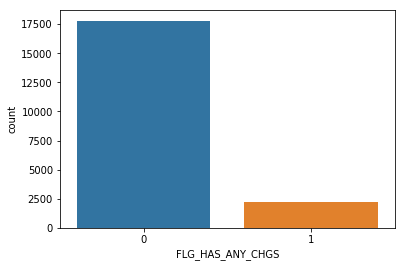

In [41]:
sns.countplot(x='FLG_HAS_ANY_CHGS',data=df)

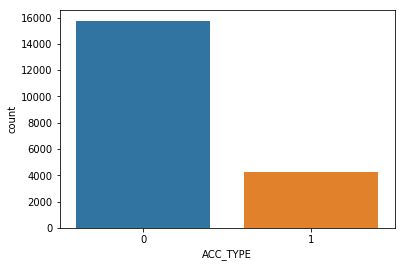

In [42]:
sns.countplot(x='ACC_TYPE',data=df) # SA - 0, CA - 1

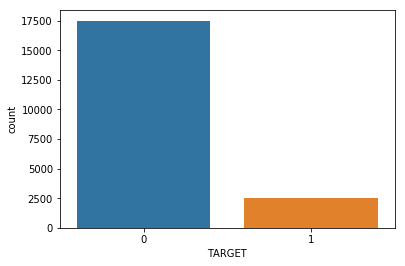

In [43]:
sns.countplot(x='TARGET',data=df) # 0 - Not Responded, 1 - Responded for Personal Loan

In [44]:
# We can infer from the bar plots that
# Nearly 3/4th of the customers targeted in the loan campaign belonged to male gender.
# Salaried and Professional class form majority of the targeted customers.
# A quarter of the customers had a credit card
# equal proportion of customers in the dataset have an old loan or did not have one.
# More number of customers have savings account

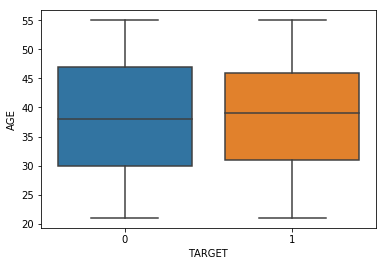

In [45]:
sns.boxplot(x='TARGET',y='AGE',data=df)

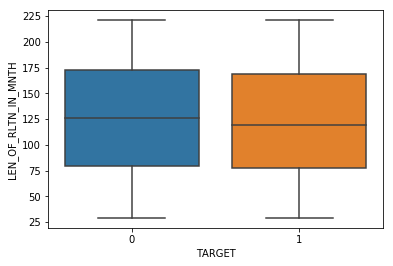

In [46]:
sns.boxplot(x='TARGET',y='LEN_OF_RLTN_IN_MNTH',data=df)

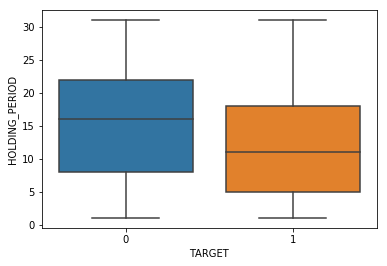

In [47]:
sns.boxplot(x='TARGET',y='HOLDING_PERIOD',data=df)

In [48]:
# When we look at the data visualization from bivariate analysis of numeric variables 
# against the categorical target variable, we get the following insights:
# AGE vs Target (TARGET: responded to loan campaign = 1; Did not respond to loan campaign = 0)
# The median age of customers who responded to the campaign is slightly higher than the age of those who didn’t respond. 
# There is not much differentiation though between the two classes based on Age, an inference we also draw from 
# Length of Relationship with Bank in Months vs TARGET class.
# Customers who had lesser median holding period (Ability to hold money in the account) 
# of around 10 months are the ones who had responded to the personal loan campaign.

In [49]:
# plt.stackplot(x='GENDER',y='TARGET',)

In [50]:
# Split x and y
x = df.drop('TARGET',axis = 1)
y = df['TARGET']

In [51]:
# Split into train and test

x_std = preprocessing.StandardScaler().fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_std,y,test_size=0.3,random_state=0)

In [52]:
# Instantiating the classification models

log_model = LogisticRegression()
gini_model = DecisionTreeClassifier(max_depth=5)
ent_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
knn_model = KNeighborsClassifier()
nbg_model = GaussianNB()
nbb_model = BernoulliNB()
nbm_model = MultinomialNB()
rf_gini_model = RandomForestClassifier(n_estimators=10,max_depth=5,criterion='gini')
rf_ent_model = RandomForestClassifier(n_estimators=10,max_depth=5,criterion='entropy')
svm_model = SVC()

In [53]:
models = []

models.append(('Logistic Regression Model',log_model))
models.append(('Decision Tree Model-Gini',gini_model))
models.append(('Decision Tree Model-Entropy',ent_model))
models.append(('KNN Model',knn_model))
models.append(('Random Forest Model-Gini',rf_gini_model))
models.append(('Random Forest Model-Entropy',rf_ent_model))
models.append(('Naive Bayes Model-Gaussian',nbg_model))
models.append(('Naive Bayes Model-Bernoulli',nbb_model))
models.append(('Naive Bayes Model-Multinomial',nbm_model))
models.append(('SVM Model',svm_model))

In [54]:
# Getting the AUC Scores, Bias and Variance errors

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

results = []
names = []

for name,model in models:
    kfold = KFold(n_splits = 5, shuffle = True, random_state = 2)
    if model == knn_model:
        cv_results = cross_val_score(model,x_std,y,cv = kfold, scoring = 'roc_auc')
    else:
        cv_results = cross_val_score(model,x,y,cv = kfold, scoring = 'roc_auc')##scoring  = f1_weighted, scoring = 'recall'
    results.append(cv_results)
    names.append(name)
    msg = '\n%s:\n\n\t\t %s (%f) %s (%f) %s (%f) ' % (name,"AUC Score:",np.mean(cv_results),",Bias Error:",
                                          1-np.mean(cv_results),",Variance Error:",np.var(cv_results, ddof = 1)) # "f1score"
    print(msg)


Logistic Regression Model:

		 AUC Score: (0.566605) ,Bias Error: (0.433395) ,Variance Error: (0.000093) 

Decision Tree Model-Gini:

		 AUC Score: (0.694741) ,Bias Error: (0.305259) ,Variance Error: (0.000050) 

Decision Tree Model-Entropy:

		 AUC Score: (0.699420) ,Bias Error: (0.300580) ,Variance Error: (0.000137) 

KNN Model:

		 AUC Score: (0.859539) ,Bias Error: (0.140461) ,Variance Error: (0.000044) 

Random Forest Model-Gini:

		 AUC Score: (0.744639) ,Bias Error: (0.255361) ,Variance Error: (0.000204) 

Random Forest Model-Entropy:

		 AUC Score: (0.753499) ,Bias Error: (0.246501) ,Variance Error: (0.000102) 

Naive Bayes Model-Gaussian:

		 AUC Score: (0.617749) ,Bias Error: (0.382251) ,Variance Error: (0.000157) 

Naive Bayes Model-Bernoulli:

		 AUC Score: (0.624721) ,Bias Error: (0.375279) ,Variance Error: (0.000516) 

Naive Bayes Model-Multinomial:

		 AUC Score: (0.581509) ,Bias Error: (0.418491) ,Variance Error: (0.000056) 

SVM Model:

		 AUC Score: (0.959654) ,Bias 

In [55]:
# Printing the train and test accuracy for all the classification models

for model in models:
    
    if model[1] == knn_model:
        model[1].fit(x_train1,y_train1)
        print('Training Accuracy:',model[0],model[1].score(x_train1,y_train1))
        print('Test Accuracy:',model[0],model[1].score(x_test1,y_test1))
    
    else:
        model[1].fit(x_train,y_train)
        print('Training Accuracy:',model[0],model[1].score(x_train,y_train))
        print('Test Accuracy:',model[0],model[1].score(x_test,y_test))

Training Accuracy: Logistic Regression Model 0.8768571428571429
Test Accuracy: Logistic Regression Model 0.8675
Training Accuracy: Decision Tree Model-Gini 0.8846428571428572
Test Accuracy: Decision Tree Model-Gini 0.8715
Training Accuracy: Decision Tree Model-Entropy 0.8822857142857143
Test Accuracy: Decision Tree Model-Entropy 0.8696666666666667
Training Accuracy: KNN Model 0.9226428571428571
Test Accuracy: KNN Model 0.8768333333333334
Training Accuracy: Random Forest Model-Gini 0.8791428571428571
Test Accuracy: Random Forest Model-Gini 0.8691666666666666
Training Accuracy: Random Forest Model-Entropy 0.8775
Test Accuracy: Random Forest Model-Entropy 0.868
Training Accuracy: Naive Bayes Model-Gaussian 0.8168571428571428
Test Accuracy: Naive Bayes Model-Gaussian 0.8078333333333333
Training Accuracy: Naive Bayes Model-Bernoulli 0.7895
Test Accuracy: Naive Bayes Model-Bernoulli 0.7831666666666667
Training Accuracy: Naive Bayes Model-Multinomial 0.5876428571428571
Test Accuracy: Naive Ba

In [56]:
# Getting the training and testing accuracy in a dataframe

Accuracy_Scores=pd.DataFrame([[log_model.score(x_train,y_train),log_model.score(x_test,y_test)],
                             [gini_model.score(x_train,y_train),gini_model.score(x_test,y_test)],
                             [ent_model.score(x_train,y_train),ent_model.score(x_test,y_test)],
                             [knn_model.score(x_train1,y_train1),knn_model.score(x_test1,y_test1)],
                             [rf_gini_model.score(x_train,y_train),rf_gini_model.score(x_test,y_test)],
                             [rf_ent_model.score(x_train,y_train),rf_ent_model.score(x_test,y_test)],
                             [nbg_model.score(x_train,y_train),nbg_model.score(x_test,y_test)],
                             [nbb_model.score(x_train,y_train),nbb_model.score(x_test,y_test)],
                             [nbm_model.score(x_train,y_train),nbm_model.score(x_test,y_test)],
                             [svm_model.score(x_train,y_train),svm_model.score(x_test,y_test)]],
                             columns=["Training Accuracy","Testing Accuracy"]
                               ,index= ["Logistic Regression","Decision Tree - Gini",
                                        "Decision Tree - Entropy","KNN Model",
                                     "Random Forest Model - Gini","Random Forest Model - Entropy",
                                        "Naive Bayes - Gaussian","Naive Bayes - Bernoulli",
                                       "Naive-Bayes - Multinomial","SVM Model"])

In [57]:
Accuracy_Scores

,Training Accuracy,Testing Accuracy
Logistic Regression,0.876857,0.867500
Decision Tree - Gini,0.884643,0.871500
Decision Tree - Entropy,0.882286,0.869667
KNN Model,0.922643,0.876833
Random Forest Model - Gini,0.879143,0.869167
Random Forest Model - Entropy,0.877500,0.868000
Naive Bayes - Gaussian,0.816857,0.807833
Naive Bayes - Bernoulli,0.789500,0.783167
Naive-Bayes - Multinomial,0.587643,0.596000
SVM Model,1.000000,0.957333


In [ ]:
# From the above dataframe, we can conclude that the testing accuracy obtained using SVM Model is better than other
# classification models and using SVM Model we can predict the outcome of whether the customer accepts personal loan
# or not much better and accurate.